In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import pandas as pd
from datetime import datetime, timedelta
from sklearn.decomposition import PCA

In [2]:
xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

data_startcol = 7
ogDatasObj = {}
for col in xlsx:
    if col >= data_startcol: # startcol 7
        ogDatasObj[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]

ogDatas = pd.DataFrame(ogDatasObj)
ogDatas = ogDatas.fillna(0)
ogDatas = ogDatas.reset_index()
del ogDatas['index']

pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 100)

ogDatas

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,아파트1-103-502,아파트1-103-1602,아파트1-103-301,아파트1-103-1502,아파트1-103-202,아파트1-102-903,아파트1-102-603,아파트1-102-203,아파트1-102-704,아파트1-102-703,아파트1-102-403,아파트1-102-303,아파트1-101-604,아파트1-101-1602,아파트1-101-1002,아파트1-101-1202,아파트1-101-1604,아파트1-101-402,아파트1-101-303,아파트1-101-502,아파트1-101-1403,아파트1-101-904,아파트1-101-1502,아파트1-101-1102,아파트1-101-901,아파트1-101-704,아파트1-101-504,아파트1-102-104,아파트1-102-301,아파트1-102-1501,아파트1-102-1602,아파트1-102-1002,아파트1-102-401,아파트1-102-802,아파트1-102-801,아파트1-103-505,아파트1-103-1805,아파트1-103-1306,아파트1-103-1806,아파트1-103-803,...,아파트4-103-609,아파트4-103-707,아파트4-103-101,아파트4-102-803,아파트4-101-1501,아파트4-103-404,아파트4-103-909,아파트4-101-1203,아파트4-103-806,아파트4-103-1410,아파트4-103-402,아파트4-103-703,아파트4-103-106,아파트4-103-910,아파트4-102-402,아파트4-103-907,아파트4-103-1406,아파트4-103-1006,아파트4-103-608,아파트4-103-403,아파트4-105-1102,아파트4-103-804,아파트4-103-103,아파트4-103-706,아파트4-104-1001,아파트4-105-103,아파트4-102-401,아파트4-103-1104,아파트4-103-906,아파트4-103-606,아파트4-103-1307,아파트4-103-410,아파트4-103-1309,아파트4-102-102,아파트4-103-508,아파트4-105-1104,아파트4-102-1402,아파트4-103-407,아파트4-103-1206,아파트4-103-108,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
0,0.085,0.016,0.052,0.003,0.032,0.074,0.053,0.096,0.105,0.042,0.149,0.039,0.054,0.132,0.091,0.169,0.051,0.118,0.060,0.047,0.047,0.053,0.046,0.104,0.079,0.092,0.043,0.069,0.139,0.026,0.146,0.092,0.025,0.127,0.045,0.042,0.113,0.207,0.030,0.171,0.045,0.064,0.045,0.277,0.186,0.142,0.132,0.034,0.088,0.041,...,0.041,0.137,0.114,0.046,0.098,0.058,0.068,0.040,0.063,0.048,0.168,0.053,0.099,0.075,0.080,0.158,0.024,0.153,0.056,0.037,0.091,0.069,0.128,0.092,0.072,0.069,0.034,0.166,0.086,0.113,0.184,0.175,0.096,0.054,0.080,0.084,0.119,0.088,0.117,0.161,0.182,0.044,0.051,0.057,0.126,0.094,0.065,0.116,0.093,0.147
1,0.086,0.049,0.053,0.002,0.022,0.014,0.048,0.090,0.108,0.022,0.119,0.023,0.075,0.142,0.063,0.183,0.045,0.164,0.065,0.066,0.043,0.056,0.045,0.130,0.081,0.102,0.042,0.083,0.176,0.046,0.113,0.088,0.026,0.116,0.066,0.050,0.139,0.188,0.031,0.165,0.032,0.068,0.052,0.244,0.209,0.205,0.161,0.039,0.094,0.036,...,0.036,0.083,0.124,0.055,0.115,0.068,0.072,0.032,0.085,0.111,0.173,0.050,0.103,0.068,0.076,0.360,0.031,0.132,0.038,0.037,0.097,0.075,0.123,0.072,0.053,0.059,0.023,0.135,0.143,0.112,0.101,0.163,0.154,0.078,0.036,0.076,0.092,0.042,0.121,0.179,0.117,0.060,0.036,0.055,0.116,0.089,0.083,0.113,0.105,0.130
2,0.085,0.013,0.073,0.002,0.016,0.051,0.029,0.033,0.097,0.046,0.116,0.018,0.071,0.096,0.159,0.122,0.043,0.141,0.097,0.064,0.055,0.054,0.051,0.119,0.109,0.097,0.056,0.086,0.126,0.036,0.113,0.079,0.027,0.170,0.072,0.044,0.163,0.201,0.053,0.163,0.041,0.071,0.046,0.256,0.173,0.199,0.122,0.028,0.084,0.026,...,0.045,0.081,0.115,0.063,0.070,0.053,0.078,0.036,0.083,0.111,0.084,0.053,0.084,0.071,0.087,0.471,0.024,0.079,0.047,0.036,0.078,0.059,0.137,0.084,0.083,0.056,0.036,0.106,0.160,0.108,0.184,0.162,0.124,0.135,0.053,0.073,0.108,0.056,0.100,0.224,0.147,0.053,0.075,0.032,0.131,0.055,0.084,0.153,0.119,0.104
3,0.085,0.043,0.067,0.002,0.015,0.015,0.031,0.092,0.048,0.067,0.102,0.031,0.128,0.082,0.104,0.141,0.031,0.103,0.075,0.082,0.046,0.016,0.046,0.078,0.070,0.073,0.051,0.085,0.098,0.048,0.145,0.078,0.021,0.142,0.062,0.034,0.149,0.194,0.038,0.065,0.043,0.070,0.043,0.274,0.047,0.108,0.162,0.034,0.069,0.038,...,0.039,0.086,0.068,0.035,0.064,0.061,0.065,0.022,0.066,0.087,0.080,0.047,0.079,0.066,0.029,0.187,0.030,0.059,0.055,0.035,0.080,0.074,0.090,0.066,0.071,0.062,0.034,0.114,0.121,0.108,0.051,0.170,0.068,0.072,0.074,0.078,0.101,0.080,0.084,0.178,0.152,0.047,0.064,0.022,0.104,0.057,0.087,0.149,0.102,0.093
4,0.084,0.033,0.051,0.003,0.022,0.052,0.052,0.030,0.041,0.045,0.102,0.032,0.122,0.069,0.089,0.103,0.011,0.094,0.084,0.053,0.047,0.022,0.048,0.040,0.077,0.089,0.041,0.092,0.062,0.045,0.109,0.109,0.033,0.084,0.069,0.035,0.225,0.199,0.078,

In [3]:
startDate = datetime(2018,5,1)
endDate = datetime(2019,5,1)
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                   datetime_range(startDate, endDate, timedelta(days = 1))]

searchKeyword = '아파트1-104-1206'
tsDatasObj = {}
startIdx = 0;
endIdx = 96;
for date in dateIndexArr:
    tsDatasObj[date] = ogDatas[searchKeyword][startIdx:endIdx].values.tolist()
    startIdx = endIdx
    endIdx = endIdx + 96

tsDatas = pd.DataFrame(tsDatasObj)
tsDatas = tsDatas.T
tsDatas = tsDatas.reset_index()
tsDatas.rename(columns={'index':'date'}, inplace=True)
tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
tsDatas.reindex(columns=['date', 'year', 'month', 'day'])

,date,year,month,day
0,2018-05-01,2018,05,01
1,2018-05-02,2018,05,02
2,2018-05-03,2018,05,03
3,2018-05-04,2018,05,04
4,2018-05-05,2018,05,05
...,...,...,...,...
360,2019-04-26,2019,04,26
361,2019-04-27,2019,04,27
362,2019-04-28,2019,04,28
363,2019-04-29,2019,04,29


In [41]:
DAYS = {
    "월" : 0,
    "화" : 1,
    "수" : 2,
    "목" : 3,
    "금" : 4,
    "토" : 5,
    "일" : 6
}

SEASONS = {
    "봄" : ["03", "04", "05"],
    "여름" : ["06", "07", "08"],
    "가을" : ["09", "10", "11"],
    "겨울" : ["12", "01", "02"]
}

ALLDATAS = False
DAY = "월"
SEASON = "여름"
# ALLDATAS is tsDatas
if ALLDATAS:
    datas = tsDatas
else :    
    datas = tsDatas[(tsDatas['month'].isin(SEASONS[SEASON]))
            & (tsDatas['date'].dt.weekday == DAYS[DAY]) ]
datas

,date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,year,month,day
34,2018-06-04,0.064,0.057,0.058,0.056,0.052,0.051,0.051,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.050,0.050,0.050,0.050,0.050,0.051,0.050,0.054,0.056,0.055,0.040,0.055,0.057,0.103,0.056,0.053,0.052,0.052,0.052,0.051,0.052,0.051,0.051,0.050,0.051,0.051,0.051,0.051,0.051,0.051,0.052,0.051,0.052,0.051,0.051,0.051,0.050,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.051,0.051,0.050,0.052,0.050,0.051,0.050,0.051,0.050,0.051,0.054,0.057,0.056,0.073,0.097,0.085,0.083,0.083,0.082,0.102,0.105,0.102,0.105,0.105,0.108,0.109,0.108,0.108,0.083,0.078,0.077,0.059,2018,06,04
41,2018-06-11,0.097,0.097,0.097,0.097,0.097,0.097,0.097,0.097,0.097,0.100,0.098,0.062,0.061,0.061,0.060,0.061,0.060,0.060,0.059,0.064,0.066,0.065,0.048,0.064,0.062,0.062,0.060,0.062,0.061,0.061,0.065,0.079,0.050,0.051,0.051,0.050,0.051,0.051,0.051,0.052,0.050,0.051,0.050,0.050,0.050,0.051,0.051,0.051,0.050,0.049,0.050,0.050,0.050,0.051,0.050,0.050,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.045,0.031,0.051,0.051,0.051,0.051,0.030,0.047,0.051,0.054,0.056,0.057,0.043,0.053,0.054,0.053,0.053,0.052,0.052,0.052,0.052,0.069,0.090,0.086,0.081,0.081,0.082,0.085,0.086,0.079,0.058,0.060,0.059,2018,06,11
48,2018-06-18,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.055,0.054,0.055,0.054,0.054,0.054,0.054,0.054,0.054,0.053,0.054,0.054,0.053,0.054,0.054,0.053,0.053,0.054,0.053,0.053,0.053,0.054,0.053,0.054,0.053,0.054,0.053,0.053,0.054,0.053,0.053,0.054,0.054,0.053,0.053,0.054,0.053,0.054,0.053,0.053,0.054,0.052,0.055,0.058,0.082,0.087,0.091,0.095,0.102,0.095,0.094,0.093,0.090,0.089,0.090,0.089,0.072,0.059,0.058,0.059,2018,06,18
55,2018-06-25,0.068,0.059,0.058,0.059,0.058,0.058,0.059,0.058,0.058,0.057,0.056,0.057,0.056,0.057,0.057,0.056,0.057,0.060,0.062,0.062,0.046,0.061,0.059,0.059,0.058,0.057,0.058,0.057,0.057,0.057,0.058,0.090,0.052,0.050,0.051,0.050,0.050,0.051,0.051,0.050,0.051,0.050,0.050,0.050,0.050,0.050,0.050,0.050,0.050,0.050,0.049,0.050,0.050,0.050,0.050,0.050,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.051,0.054,0.057,0.057,0.041,0.055,0.053,0.051,0.052,0.052,0.051,0.052,0.051,0.050,0.050,0.051,0.050,0.051,0.054,0.229,0.359,0.369,0.300,0.139,0.089,0.087,0.080,0.317,0.321,2018,06,25
62,2018-07-02,0.050,0.050,0.048,0.030,0.049,0.050,0.051,0.050,0.050,0.050,0.053,0.056,0.127,0.300,0.189,0.181,0.160,0.128,0.059,0.059,0.057,0.058,0.057,0.056,0.057,0.056,0.056,0.056,0.057,0.057,0.057,0.067,0.105,0.052,0.053,0.053,0.053,0.053,0.053,0.054,0.053,0.053,0.053,0.053,0.053,0.036,0.047,0.054,0.054,0.054,0.055,0.054,0.053,0.054,0.053,0.053,0.053,0.053,0.053,0.047,0.032,0.054,0.053,0.053,0.059,0.058,0.059,0.043,0.058,0.056,0.055,0.055,0.055,0.055,0.054,0.054,0.054,0.054,0.053,0.054,0.089,0.343,0.361,0.127,0.094,0.096,0.078,0.061,0.062,0.061,0.061,0.061,0.061,0.060,0.060,0.060,2018,07,02
69,2018-07-09,0.216,0.192,0.181,0.164,0.181,0.183,0.162,0.174,0.183,0.156,0.057,0.058,0.057,0.056,0.056,0.057,0.056,0.056,0.056,0.056,0.056,0.056,0.057,0.055,0.056,0.055,0.056,0.057,0.057,0.056,0.057,0.059,0.086,0.050,0.049,0.050,0.050,0.049,0.051,0.049,0.050,0.050,0.049,0.050,0.050,0.050,0.050,0.050,0.051,0.050,0.050,0.050,0.050,0.050,0.053,0.057,0.057,0.040,0.055,0.053,0.052,0.051,0.052,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.050,0.051,0.050,0.050,0.070,0.114,0.080,0.080,0.080,0.080,0.081,0.082,0.081,0.081,0.082,0.081,0.081,0.082,0.082,0.081,0.081,0.081,0.081,0.080,2018,07,09
76,2018-07-16,0.055,0.055,0.055,0.055,0.054,0.055,0.055,0.054,0.054,0.054,0.055,0.054,0.054,0.0

In [16]:
import seaborn as sns

In [36]:
logDatas = datas.reset_index().copy()
logDatas = logDatas[logDatas.columns.difference(['index', 'day', 'month', 'year'])]
logDatas.set_index('date', inplace=True)
logDatas = logDatas.T
logDatas['2018-06-04'].skew()

1.7798335812887651

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2018-06-04 00:00:00', ylabel='Density'>

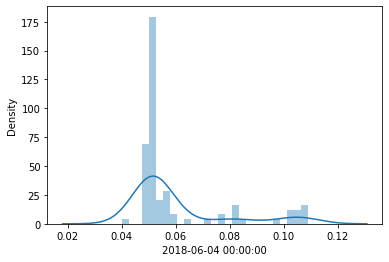

In [37]:
sns.distplot(logDatas['2018-06-04'])

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2018-06-04 00:00:00', ylabel='Density'>

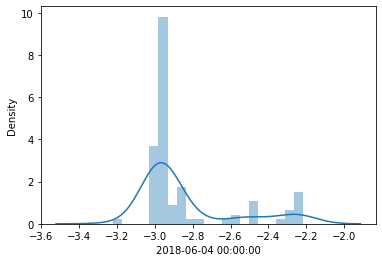

In [38]:
# 최솟값 확인
logDatas['2018-06-04'].describe()
# logDatas['2018-06-04'] = logDatas['2018-06-04'] + logDatas['2018-06-04'].min() + 1
# logDatas
# 최솟값이 0보다 작다면 (최솟값 + 1)을 모든 값에 더해주는 것이 보편적

# 로그 변환
logDatas = np.log(logDatas['2018-06-04'])
logDatas
sns.distplot(logDatas)

In [45]:
sqrtDatas = datas.reset_index().copy()
sqrtDatas = sqrtDatas[sqrtDatas.columns.difference(['index', 'day', 'month', 'year'])]
sqrtDatas.set_index('date', inplace=True)
sqrtDatas = sqrtDatas.T
sqrtDatas['2018-06-04'].skew()

1.7798335812887651

In [46]:
sqrtDatas = np.sqrt(sqrtDatas['2018-06-04'])
sqrtDatas.skew()

1.68947932232148

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2018-06-04 00:00:00', ylabel='Density'>

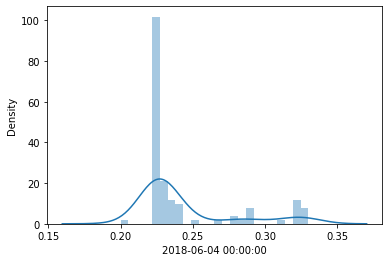

In [47]:
sns.distplot(sqrtDatas)

In [56]:
from scipy import stats
bcDatas = datas.reset_index().copy()
bcDatas = bcDatas[bcDatas.columns.difference(['index', 'day', 'month', 'year'])]
bcDatas.set_index('date', inplace=True)
bcDatas = bcDatas.T
bcDatas['2018-06-04'].skew()

1.7798335812887651

In [58]:
bcDatas = pd.Series(stats.boxcox(bcDatas['2018-06-04'])[0])
bcDatas
sns.distplot(bcDatas)

KeyError: '2018-06-04'

정규분포란
---
***정규분포(Normal Distribution)*** 는 통계학에서 연속 확률 분포의 한 종류로서 데이터의 분포를 근사하는데, 가장 흔하게 사용된다.

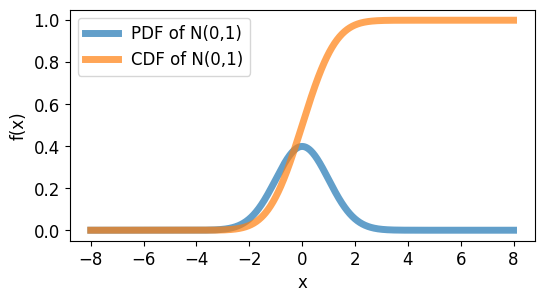

In [229]:
np.random.seed(0)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6,3)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 5

# 평균(mu) 0.0
# 표준편차(sigma) 1.0 을 갖는 정규 분포의 확률 밀도 함수와 누적 분포 함수를 나타냄 
mu = 0.0
sigma = 1.0

x = np.linspace(-8, 8, 1000)
y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma**2))
y_cum = 0.5 * (1 + erf((x - mu) / (np.sqrt(2 * sigma**2))))

# 확률 밀도 함수 (probability density function)
# 확률 변수의 분포를 나타내는 함수
plt.plot(x, y, alpha=0.7, label='PDF of N(0,1)')
# 누적 분포 함수 (cumulative distribution function)
# 주어진 확률 변수가 특정 값보다 작거나 같은 확률을 나타내는 함수
plt.plot(x, y_cum, alpha=0.7, label='CDF of N(0,1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left')
plt.show()

In [230]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


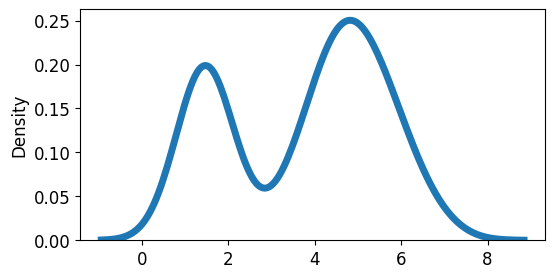

In [15]:
x = iris.petal_length.values
sns.kdeplot(x)
plt.show()

<AxesSubplot:xlabel='1', ylabel='Density'>

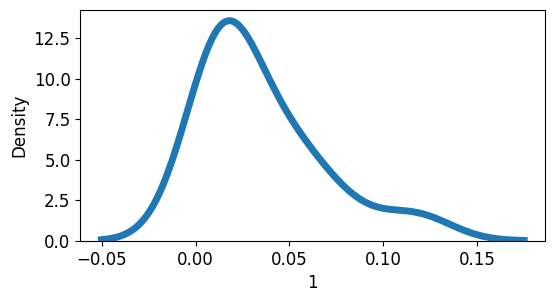

In [20]:
sns.kdeplot(datas[1])

In [231]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

In [232]:
dpp = datas[datas.columns.difference(['date', 'year', 'month', 'day'])]
dpp = dpp

# Scaler 선택
# STD, MIN, MAX, ROBUST
selScaler = "MAX"

scaler = StandardScaler()
if selScaler == "STD":
    scaler = StandardScaler()
elif selScaler == "MIN":
    scaler = MinMaxScaler()
elif selScaler == "MAX":
    scaler = MaxAbsScaler()
elif selScaler == "ROBUST":
    scaler = RobustScaler()

dpp = pd.DataFrame(scaler.fit_transform(dpp))

dpp.index = datas['date']
dpp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-04,0.182336,0.163793,0.175758,0.167665,0.156627,0.153614,0.154079,0.154079,0.149701,0.147399,0.145773,0.148688,0.145349,0.149560,0.146628,0.149560,0.155280,0.156250,0.149701,0.148810,0.148810,0.152239,0.149254,0.161677,0.165680,0.162242,0.117647,0.164179,0.168142,0.302941,0.164223,0.155425,0.149856,0.150725,0.149856,0.500000,0.912281,0.217949,0.144068,0.183150,0.141667,0.144068,0.210744,0.662338,0.689189,0.607143,0.693333,0.621951,0.626506,0.836066,0.836066,0.910714,0.925926,0.944444,0.962264,0.894737,0.894737,0.944444,0.927273,0.944444,0.944444,0.944444,0.892857,0.910714,0.864407,0.879310,0.847458,0.962963,0.862069,0.894737,0.877193,0.927273,0.909091,0.910714,0.947368,1.000000,0.337349,0.226708,0.560694,0.221932,0.932584,0.241983,0.227147,0.803150,1.000000,0.265625,0.384615,0.292479,0.292683,0.363333,0.776978,1.000000,0.360870,0.204724,0.204244,0.157333
2018-06-11,0.276353,0.278736,0.293939,0.290419,0.292169,0.292169,0.293051,0.293051,0.290419,0.289017,0.285714,0.180758,0.177326,0.178886,0.175953,0.178886,0.186335,0.187500,0.176647,0.190476,0.196429,0.194030,0.143284,0.191617,0.183432,0.182891,0.176471,0.185075,0.179941,0.179412,0.190616,0.231672,0.144092,0.147826,0.146974,0.490196,0.894737,0.217949,0.144068,0.190476,0.138889,0.144068,0.206612,0.649351,0.675676,0.607143,0.680000,0.621951,0.602410,0.803279,0.819672,0.892857,0.925926,0.944444,0.943396,0.877193,0.894737,0.925926,0.927273,0.944444,0.925926,0.944444,0.910714,0.803571,0.525424,0.879310,0.864407,0.944444,0.879310,0.526316,0.824561,0.927273,0.981818,1.000000,1.000000,0.754386,0.319277,0.167702,0.306358,0.138381,0.584270,0.151603,0.144044,0.409449,0.657143,0.234375,0.315018,0.225627,0.219512,0.273333,0.611511,0.796296,0.343478,0.152231,0.159151,0.157333
2018-06-18,0.170940,0.172414,0.181818,0.179641,0.180723,0.180723,0.181269,0.181269,0.179641,0.173410,0.174927,0.174927,0.174419,0.175953,0.175953,0.175953,0.186335,0.187500,0.179641,0.178571,0.178571,0.179104,0.179104,0.179641,0.177515,0.176991,0.176471,0.179104,0.176991,0.176471,0.175953,0.175953,0.172911,0.173913,0.172911,0.588235,0.964912,0.230769,0.155367,0.197802,0.150000,0.152542,0.223140,0.701299,0.729730,0.630952,0.720000,0.658537,0.638554,0.885246,0.885246,0.946429,0.981481,1.000000,1.000000,0.929825,0.929825,1.000000,0.963636,1.000000,0.981481,1.000000,0.946429,0.946429,0.915254,0.913793,0.898305,1.000000,0.931034,0.929825,0.929825,0.981818,0.963636,0.964286,0.929825,0.929825,0.325301,0.161491,0.317919,0.151436,0.921348,0.253644,0.252078,0.748031,0.971429,0.247396,0.344322,0.259053,0.243902,0.296667,0.647482,0.824074,0.313043,0.154856,0.153846,0.157333
2018-06-25,0.193732,0.169540,0.175758,0.176647,0.174699,0.174699,0.178248,0.175227,0.173653,0.164740,0.163265,0.166181,0.162791,0.167155,0.167155,0.164223,0.177019,0.187500,0.185629,0.184524,0.136905,0.182090,0.176119,0.176647,0.171598,0.168142,0.170588,0.170149,0.168142,0.167647,0.170088,0.263930,0.149856,0.144928,0.146974,0.490196,0.877193,0.217949,0.144068,0.183150,0.141667,0.141243,0.206612,0.649351,0.675676,0.595238,0.666667,0.609756,0.602410,0.819672,0.803279,0.892857,0.925926,0.925926,0.943396,0.877193,0.894737,0.925926,0.927273,0.925926,0.944444,0.925926,0.910714,0.892857,0.864407,0.862069,0.864407,0.944444,0.931034,1.000000,1.000000,0.745455,1.000000,0.946429,0.894737,0.912281,0.313253,0.158385,0.300578,0.133159,0.561798,0.145773,0.141274,0.393701,0.485714,0.140625,0.838828,1.000000,1.000000,1.000000,1.000000,0.824074,0.378261,0.209974,0.840849,0.856000
2018-07-02,0.142450,0.143678,0.145455,0.089820,0.147590,0.150602,0.154079,0.151057,0.149701,0.144509,0.154519,0.163265,0

In [240]:
m_15 = datas[3].values.tolist()
m_15

[0.056,
 0.097,
 0.06,
 0.059,
 0.03,
 0.164,
 0.055,
 0.082,
 0.058,
 0.334,
 0.331,
 0.293,
 0.146]

In [241]:
mu = np.mean(m_15)
sigma = np.std(m_15)
max = np.max(m_15)
min = np.min(m_15)

In [242]:
mu

0.13576923076923075

In [243]:
sigma

0.10712476826734031

In [244]:
max

0.334

In [245]:
min

0.03

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


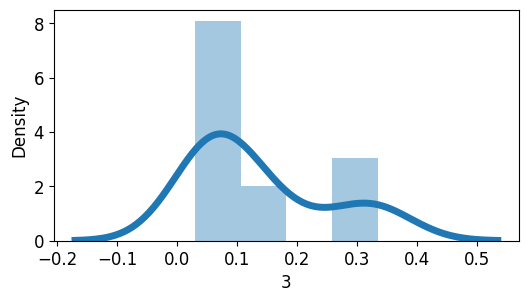

In [246]:
idx = 3
sns.distplot(datas[idx])
plt.show()

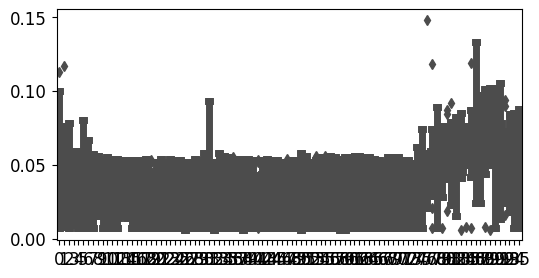

In [124]:
sns.boxplot(data=datas, color='red')
plt.show()

In [147]:
pca = PCA(n_components=2)

pca.fit(dpp)
dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

dr.index = datas['date']
dr

,x,y
date,,
2018-05-07,3.433479,-0.172055
2018-05-14,3.398709,0.585126
2018-05-21,3.765697,-0.080917
2018-05-28,3.402146,0.170209
2019-03-04,-0.331439,0.344810
2019-03-11,-1.502086,0.844255
2019-03-18,-1.718047,0.042367
2019-03-25,-0.942912,-1.636023
2019-04-01,-2.517161,-0.306940


<AxesSubplot:>

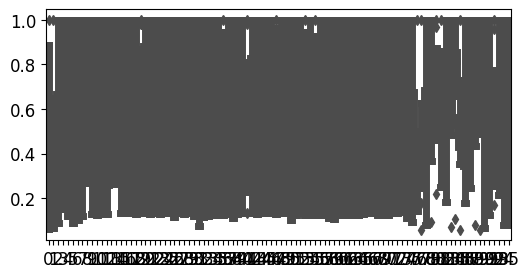

In [154]:
sns.boxplot(data=dpp, color='red')

In [186]:
# dpp.reset_index(inplace=True)
# del dpp['date']
# datas.reset_index(inplace=True)
# del datas['date']

condition = (datas < (quartile_1 - 1.5 * IQR)) | (datas > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
condition
# search_df = datas[condition]
# search_df
datas
del datas['level_0']
del datas['index']

<ipython-input-186-49aba002a657>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition = (datas < (quartile_1 - 1.5 * IQR)) | (datas > (quartile_3 + 1.5 * IQR))
<ipython-input-186-49aba002a657>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition = (datas < (quartile_1 - 1.5 * IQR)) | (datas > (quartile_3 + 1.5 * IQR))


In [211]:
pureDatas = datas[datas.columns.difference(['date', 'year', 'month', 'day'])]

quartile_1 = np.percentile(pureDatas, 25)
quartile_3 = np.percentile(pureDatas, 75)

quartile_1
quartile_3

IQR = quartile_3 - quartile_1
IQR

condition = (pureDatas < (quartile_1 - 1.5 * IQR)) | (pureDatas > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
condition
pureDatas.drop(pureDatas[condition].index)
# pureDatas

# pureDatas[condition]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
3,0.054,0.054,0.054,0.054,0.054,0.080,0.067,0.053,0.055,0.054,0.055,0.054,0.054,0.053,0.053,0.043,0.039,0.053,0.054,0.053,0.052,0.033,0.048,0.054,0.053,0.053,0.036,0.044,0.054,0.053,0.053,0.076,0.043,0.050,0.051,0.050,0.031,0.045,0.050,0.050,0.051,0.032,0.044,0.051,0.050,0.050,0.043,0.033,0.051,0.052,0.058,0.056,0.043,0.053,0.054,0.052,0.052,0.051,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.050,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.050,0.051,0.084,0.097,0.093,0.096,0.071,0.062,0.061,0.052,0.041,0.058
4,0.029,0.021,0.021,0.021,0.035,0.037,0.021,0.020,0.021,0.028,0.037,0.028,0.020,0.022,0.020,0.037,0.034,0.021,0.021,0.021,0.028,0.038,0.025,0.021,0.051,0.033,0.037,0.033,0.021,0.021,0.021,0.029,0.037,0.025,0.021,0.021,0.021,0.038,0.032,0.021,0.021,0.021,0.030,0.037,0.024,0.021,0.021,0.021,0.038,0.031,0.021,0.021,0.020,0.032,0.037,0.024,0.021,0.021,0.021,0.040,0.031,0.021,0.021,0.021,0.031,0.037,0.023,0.021,0.021,0.024,0.038,0.030,0.021,0.021,0.022,0.032,0.038,0.021,0.021,0.028,0.076,0.092,0.081,0.075,0.062,0.061,0.072,0.076,0.061,0.060,0.061,0.065,0.073,0.029,0.022,0.022
5,0.013,0.013,0.013,0.029,0.037,0.016,0.012,0.013,0.026,0.031,0.023,0.013,0.012,0.021,0.028,0.029,0.016,0.021,0.012,0.018,0.030,0.030,0.016,0.013,0.033,0.037,0.029,0.018,0.013,0.013,0.013,0.031,0.027,0.013,0.012,0.013,0.021,0.029,0.021,0.013,0.013,0.012,0.028,0.029,0.014,0.013,0.013,0.016,0.030,0.024,0.013,0.012,0.013,0.023,0.029,0.018,0.012,0.013,0.013,0.028,0.028,0.013,0.013,0.012,0.017,0.030,0.022,0.013,0.012,0.013,0.022,0.029,0.017,0.013,0.013,0.012,0.026,0.029,0.026,0.064,0.053,0.048,0.064,0.062,0.056,0.046,0.046,0.052,0.070,0.061,0.036,0.013,0.016,0.025,0.029,0.020
6,0.050,0.041,0.040,0.009,0.041,0.043,0.027,0.026,0.026,0.033,0.025,0.019,0.007,0.021,0.027,0.039,0.030,0.016,0.007,0.007,0.014,0.024,0.023,0.023,0.026,0.027,0.031,0.043,0.039,0.013,0.007,0.007,0.015,0.023,0.019,0.007,0.007,0.007,0.020,0.024,0.013,0.007,0.007,0.007,0.024,0.015,0.015,0.007,0.007,0.013,0.024,0.016,0.007,0.007,0.007,0.020,0.023,0.010,0.007,0.006,0.010,0.025,0.018,0.007,0.007,0.007,0.017,0.023,0.012,0.007,0.007,0.007,0.023,0.021,0.007,0.017,0.043,0.048,0.060,0.050,0.043,0.042,0.042,0.057,0.057,0.042,0.044,0.044,0.044,0.060,0.052,0.041,0.042,0.041,0.049,0.057
8,0.007,0.016,0.024,0.014,0.007,0.007,0.007,0.024,0.021,0.007,0.007,0.007,0.014,0.024,0.014,0.007,0.007,0.007,0.020,0.023,0.007,0.007,0.007,0.007,0.026,0.018,0.006,0.007,0.007,0.013,0.024,0.012,0.006,0.007,0.007,0.017,0.024,0.008,0.006,0.007,0.007,0.021,0.021,0.007,0.007,0.007,0.007,0.023,0.019,0.007,0.006,0.007,0.007,0.024,0.018,0.007,0.007,0.007,0.006,0.025,0.017,0.007,0.007,0.007,0.008,0.024,0.016,0.007,0.007,0.007,0.011,0.024,0.014,0.007,0.007,0.007,0.028,0.074,0.052,0.045,0.053,0.053,0.082,0.085,0.065,0.067,0.078,0.078,0.090,0.095,0.082,0.078,0.060,0.061,0.060,0.026
9,0.022,0.016,0.020,0.033,0.032,0.024,0.016,0.016,0.015,0.032,0.032,0.028,0.016,0.015,0.016,0.026,0.033,0.030,0.015,0.016,0.015,0.023,0.033,0.029,0.015,0.018,0.016,0.023,0.033,0.026,0.015,0.016,0.016,0.025,0.032,0.024,0.016,0.015,0.016,0.026,0.032,0.022,0.015,0.016,0.015,0.030,0.032,0.017,0.016,0.015,0.015,0.034,0.030,0.015,0.015,0.016,0.020,0.033,0.025,0.015,0.016,0.015,0.025,0.032,0.022,0.015,0.015,0.016,0.029,0.032,0.018,0.015,0.016,0.016,0.034,0.029,0.047,0.060,0.067,0.076,0.087,0.077,0.067,0.069,0.065,0.064,0.064,0.055,0.047,0.059,0.071,0.066,0.050,0.018,0.015,0.015
10,0.015,0.015,0.015,0.030,0.031,0.024,0.015,0.015,0.015,0.024,0.032,0.028,0.015,0.015,0.016,0.018,0.033,0.030,0.015,0.015,0.015,0.017,0.034,0.030,0.015,0.017,0.016,0.017,0.033,0.028,0.015,0.015,0.015,0.020,0.032,0.026,0.015,0.015,0.015,0.023,0.033,0.02

In [190]:
condition

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8     False
9      True
10    False
11     True
12    False
dtype: bool

In [201]:
from sklearn.ensemble import IsolationForest

In [202]:
pureDatas = datas[datas.columns.difference(['date', 'year', 'month', 'day'])]
pureDatas

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,0.100,0.117,0.078,0.052,0.051,0.032,0.044,0.051,0.050,0.043,0.030,0.050,0.051,0.050,0.034,0.041,0.051,0.050,0.047,0.030,0.046,0.050,0.050,0.036,0.036,0.051,0.050,0.043,0.030,0.053,0.056,0.093,0.052,0.058,0.056,0.055,0.055,0.054,0.054,0.054,0.053,0.053,0.053,0.054,0.053,0.053,0.052,0.054,0.053,0.053,0.052,0.053,0.046,0.032,0.054,0.052,0.053,0.052,0.032,0.046,0.053,0.053,0.052,0.034,0.045,0.054,0.052,0.052,0.033,0.047,0.054,0.053,0.053,0.034,0.046,0.053,0.053,0.052,0.039,0.040,0.053,0.053,0.052,0.041,0.076,0.119,0.084,0.084,0.070,0.071,0.086,0.090,0.090,0.084,0.081,0.088
1,0.113,0.076,0.056,0.059,0.059,0.047,0.055,0.057,0.056,0.054,0.054,0.054,0.054,0.053,0.053,0.053,0.053,0.052,0.053,0.052,0.052,0.054,0.052,0.052,0.052,0.051,0.052,0.051,0.051,0.051,0.058,0.092,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.050,0.043,0.030,0.049,0.051,0.050,0.043,0.029,0.049,0.051,0.051,0.038,0.032,0.050,0.050,0.048,0.030,0.044,0.051,0.050,0.037,0.034,0.056,0.056,0.053,0.043,0.054,0.053,0.052,0.052,0.052,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.118,0.089,0.064,0.062,0.061,0.060,0.059,0.057,0.054,0.053,0.050,0.050,0.050,0.046,0.029,0.046,0.050,0.050,0.041
2,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.056,0.055,0.056,0.056,0.055,0.054,0.055,0.055,0.054,0.055,0.055,0.055,0.054,0.051,0.035,0.055,0.055,0.055,0.053,0.040,0.043,0.055,0.054,0.055,0.046,0.037,0.055,0.055,0.055,0.038,0.045,0.062,0.087,0.133,0.070,0.073,0.086,0.084,0.080,0.063,0.082,0.085,0.084
3,0.054,0.054,0.054,0.054,0.054,0.080,0.067,0.053,0.055,0.054,0.055,0.054,0.054,0.053,0.053,0.043,0.039,0.053,0.054,0.053,0.052,0.033,0.048,0.054,0.053,0.053,0.036,0.044,0.054,0.053,0.053,0.076,0.043,0.050,0.051,0.050,0.031,0.045,0.050,0.050,0.051,0.032,0.044,0.051,0.050,0.050,0.043,0.033,0.051,0.052,0.058,0.056,0.043,0.053,0.054,0.052,0.052,0.051,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.050,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.050,0.051,0.084,0.097,0.093,0.096,0.071,0.062,0.061,0.052,0.041,0.058
4,0.029,0.021,0.021,0.021,0.035,0.037,0.021,0.020,0.021,0.028,0.037,0.028,0.020,0.022,0.020,0.037,0.034,0.021,0.021,0.021,0.028,0.038,0.025,0.021,0.051,0.033,0.037,0.033,0.021,0.021,0.021,0.029,0.037,0.025,0.021,0.021,0.021,0.038,0.032,0.021,0.021,0.021,0.030,0.037,0.024,0.021,0.021,0.021,0.038,0.031,0.021,0.021,0.020,0.032,0.037,0.024,0.021,0.021,0.021,0.040,0.031,0.021,0.021,0.021,0.031,0.037,0.023,0.021,0.021,0.024,0.038,0.030,0.021,0.021,0.022,0.032,0.038,0.021,0.021,0.028,0.076,0.092,0.081,0.075,0.062,0.061,0.072,0.076,0.061,0.060,0.061,0.065,0.073,0.029,0.022,0.022
5,0.013,0.013,0.013,0.029,0.037,0.016,0.012,0.013,0.026,0.031,0.023,0.013,0.012,0.021,0.028,0.029,0.016,0.021,0.012,0.018,0.030,0.030,0.016,0.013,0.033,0.037,0.029,0.018,0.013,0.013,0.013,0.031,0.027,0.013,0.012,0.013,0.021,0.029,0.021,0.013,0.013,0.012,0.028,0.029,0.014,0.013,0.013,0.016,0.030,0.024,0.013,0.012,0.013,0.023,0.029,0.018,0.012,0.013,0.013,0.028,0.028,0.013,0.013,0.012,0.017,0.030,0.022,0.013,0.012,0.013,0.022,0.029,0.017,0.013,0.013,0.012,0.026,0.029,0.026,0.064,0.053,0.048,0.064,0.062,0.056,0.046,0.046,0.052,0.070,0.061,0.036,0.013,0.016,0.025,0.029,0.020
6,0.050,0.041,0.040,0.009,0.041,0.043,0.027,0.026,0.026,0.033,0.025,0.019,0.007,0.021,0.027,0.039,0.030,0.016,0.007,0.007,0.014,0.024,0.023,0.023,0.026,0.027,0.031,0.043,0.039,0.013,0.007,0.007,0.015,0.023,0.019,0.007,0.007,0.007,0.020,0.024,0.013,0.007

In [203]:
clf = IsolationForest(max_samples=1000, random_state=1)
clf.fit(pureDatas)

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_iforest.py:263: UserWarning: max_samples (1000) is greater than the total number of samples (13). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "


IsolationForest(max_samples=1000, random_state=1)

In [205]:
y_pred_outliers = clf.predict(pureDatas)
out = pd.DataFrame(y_pred_outliers)
out = out.rename(columns={0: "out"})
out

,out
0,-1
1,-1
2,-1
3,-1
4,1
5,1
6,-1
7,1
8,1
9,1


In [206]:
test = pd.concat([pureDatas, out], 1)

In [207]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,out
0,0.100,0.117,0.078,0.052,0.051,0.032,0.044,0.051,0.050,0.043,0.030,0.050,0.051,0.050,0.034,0.041,0.051,0.050,0.047,0.030,0.046,0.050,0.050,0.036,0.036,0.051,0.050,0.043,0.030,0.053,0.056,0.093,0.052,0.058,0.056,0.055,0.055,0.054,0.054,0.054,0.053,0.053,0.053,0.054,0.053,0.053,0.052,0.054,0.053,0.053,0.052,0.053,0.046,0.032,0.054,0.052,0.053,0.052,0.032,0.046,0.053,0.053,0.052,0.034,0.045,0.054,0.052,0.052,0.033,0.047,0.054,0.053,0.053,0.034,0.046,0.053,0.053,0.052,0.039,0.040,0.053,0.053,0.052,0.041,0.076,0.119,0.084,0.084,0.070,0.071,0.086,0.090,0.090,0.084,0.081,0.088,-1
1,0.113,0.076,0.056,0.059,0.059,0.047,0.055,0.057,0.056,0.054,0.054,0.054,0.054,0.053,0.053,0.053,0.053,0.052,0.053,0.052,0.052,0.054,0.052,0.052,0.052,0.051,0.052,0.051,0.051,0.051,0.058,0.092,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.050,0.043,0.030,0.049,0.051,0.050,0.043,0.029,0.049,0.051,0.051,0.038,0.032,0.050,0.050,0.048,0.030,0.044,0.051,0.050,0.037,0.034,0.056,0.056,0.053,0.043,0.054,0.053,0.052,0.052,0.052,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.118,0.089,0.064,0.062,0.061,0.060,0.059,0.057,0.054,0.053,0.050,0.050,0.050,0.046,0.029,0.046,0.050,0.050,0.041,-1
2,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.056,0.055,0.056,0.056,0.055,0.054,0.055,0.055,0.054,0.055,0.055,0.055,0.054,0.051,0.035,0.055,0.055,0.055,0.053,0.040,0.043,0.055,0.054,0.055,0.046,0.037,0.055,0.055,0.055,0.038,0.045,0.062,0.087,0.133,0.070,0.073,0.086,0.084,0.080,0.063,0.082,0.085,0.084,-1
3,0.054,0.054,0.054,0.054,0.054,0.080,0.067,0.053,0.055,0.054,0.055,0.054,0.054,0.053,0.053,0.043,0.039,0.053,0.054,0.053,0.052,0.033,0.048,0.054,0.053,0.053,0.036,0.044,0.054,0.053,0.053,0.076,0.043,0.050,0.051,0.050,0.031,0.045,0.050,0.050,0.051,0.032,0.044,0.051,0.050,0.050,0.043,0.033,0.051,0.052,0.058,0.056,0.043,0.053,0.054,0.052,0.052,0.051,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.050,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.050,0.051,0.084,0.097,0.093,0.096,0.071,0.062,0.061,0.052,0.041,0.058,-1
4,0.029,0.021,0.021,0.021,0.035,0.037,0.021,0.020,0.021,0.028,0.037,0.028,0.020,0.022,0.020,0.037,0.034,0.021,0.021,0.021,0.028,0.038,0.025,0.021,0.051,0.033,0.037,0.033,0.021,0.021,0.021,0.029,0.037,0.025,0.021,0.021,0.021,0.038,0.032,0.021,0.021,0.021,0.030,0.037,0.024,0.021,0.021,0.021,0.038,0.031,0.021,0.021,0.020,0.032,0.037,0.024,0.021,0.021,0.021,0.040,0.031,0.021,0.021,0.021,0.031,0.037,0.023,0.021,0.021,0.024,0.038,0.030,0.021,0.021,0.022,0.032,0.038,0.021,0.021,0.028,0.076,0.092,0.081,0.075,0.062,0.061,0.072,0.076,0.061,0.060,0.061,0.065,0.073,0.029,0.022,0.022,1
5,0.013,0.013,0.013,0.029,0.037,0.016,0.012,0.013,0.026,0.031,0.023,0.013,0.012,0.021,0.028,0.029,0.016,0.021,0.012,0.018,0.030,0.030,0.016,0.013,0.033,0.037,0.029,0.018,0.013,0.013,0.013,0.031,0.027,0.013,0.012,0.013,0.021,0.029,0.021,0.013,0.013,0.012,0.028,0.029,0.014,0.013,0.013,0.016,0.030,0.024,0.013,0.012,0.013,0.023,0.029,0.018,0.012,0.013,0.013,0.028,0.028,0.013,0.013,0.012,0.017,0.030,0.022,0.013,0.012,0.013,0.022,0.029,0.017,0.013,0.013,0.012,0.026,0.029,0.026,0.064,0.053,0.048,0.064,0.062,0.056,0.046,0.046,0.052,0.070,0.061,0.036,0.013,0.016,0.025,0.029,0.020,1
6,0.050,0.041,0.040,0.009,0.041,0.043,0.027,0.026,0.026,0.033,0.025,0.019,0.007,0.021,0.027,0.039,0.030,0.016,0.007,0.007,0.014,0.024,0.023,0.023,0.026,0.027,0.031,0.043,0.039,0.013,0.007,0.007,0.015,0.023,0.019,0.007,0.007,0.007,0.0